In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests, zipfile, io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

In [31]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
print("✅ Dataset downloaded and extracted!")

df = pd.read_csv("bank.csv", sep=';')

✅ Dataset downloaded and extracted!


In [32]:
df = df[df['y'].isin(['yes', 'no'])]

df['y'] = df['y'].map({'yes': 1, 'no': 0})

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🔥 ROC AUC Score:", roc_auc_score(y_test, y_proba))



🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       801
           1       0.53      0.25      0.34       104

    accuracy                           0.89       905
   macro avg       0.72      0.61      0.64       905
weighted avg       0.87      0.89      0.87       905


📊 Confusion Matrix:
[[778  23]
 [ 78  26]]

🔥 ROC AUC Score: 0.8907135311629693


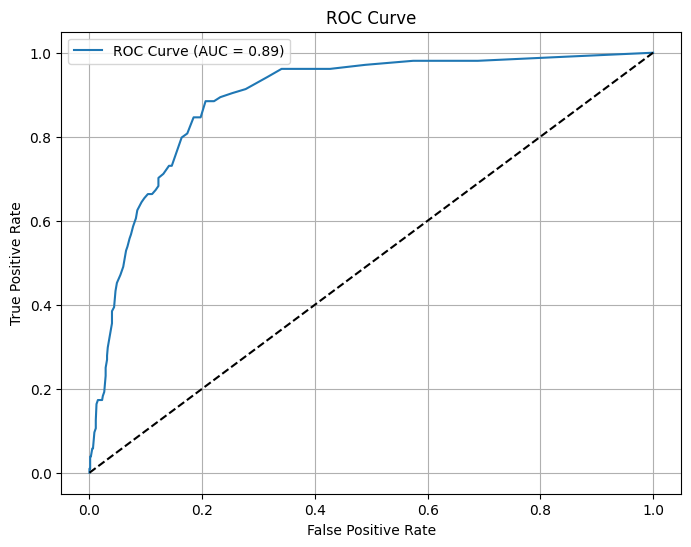

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

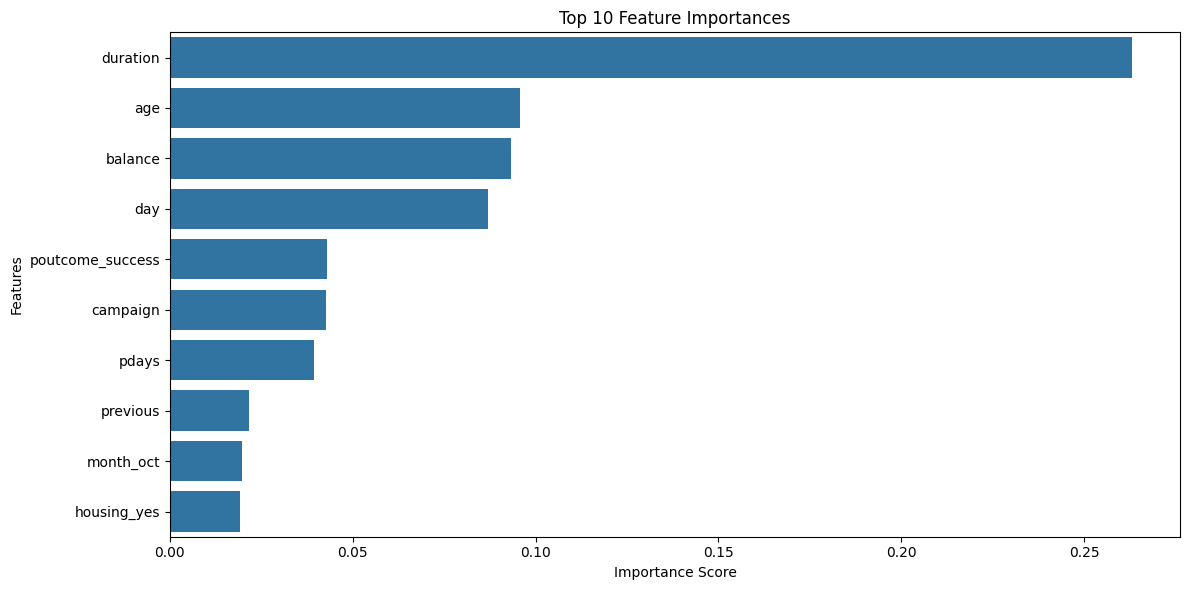

In [39]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [40]:
joblib.dump(model, 'bank_marketing_model.pkl')
print("💾 Model saved as 'bank_marketing_model.pkl'")

💾 Model saved as 'bank_marketing_model.pkl'
